$\rule{800pt}{20pt}$

# Instructions
<br>
<font size="+1">
    <ul>
        <li><b>Recommended Steps</b></li>
        <br>
        <ol>
            <li>Read the prompt and summarize the task in your own words, using as few words as possible for ease of comprehension.</li>
            <br>
            <li>Pretend to be the computer program that you are trying to create. Examine the smaple inputs and manually produce the appropriate results. Afterward, verify the correctness of your logic by comparing with the given sample outputs.</li>
            <br>
            <li>On a scrap piece of paper, write step-by-step instructions so that someone else can pretend to be the computer program and produce the appropriate results for any possible inputs. These instructions should target a human audience who does not know the problem description and only has your instructions as a guide. These instructions should serve as the roadmap for your code.</li>
            <br>
            <li>On another scrap piece of paper, write fragments of Python code to implement each step in your roadmap, focusing especially on the trickiest parts of the logic.</li>
            <br>
            <li>With your roadmap and code fragments from the previous steps, type Python code into a new Jupyter notebook cel to solve the given problem. You should type incrementally and run the code whenever you add a small chunk. This allows you to correct errors as they occur. It may also be helpful to print intermediate results to verify that the code is carrying out the logic as desired.</li>
            <br>
            <li>Run your code with some sample inputs and verify that the outputs are exactly the same as the sample outputs.</li>
            <br>
            <li>Once all of your problems are finished, it is useful to click <i>Kernel</i> $\rightarrow$ <i>Restart & Run All</i> to verify that your outputs for all of your problems continue to be correct. This helps to ensure that someone else will be able to replicate your results when running your notebook.</li>
            <br>
            <font color="red"><li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through. <b>Note that you only need to submit your solutions, not all of the other recommended steps.</b> The recommended steps are meant to serve as a guide for your thinking process.</li></font>
            <br>
            <ul style="color:red">
            <font color="red"><li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use Text/Markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use Text/Markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li></font>
        <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

# Before You Begin
<br>
<font size="+1">
    <ul>
        <li>Please read the in-class notebooks related to convolutional networks.</li>
        <br>
        <font color="blue"><li>This homework will ask you to walk through many famous tutorials from Tensorflow and Keras related to computer vision.</li></font>
        <br>
        <font color="red"><li><b>NOTE THAT THIS HOMEWORK ASSIGNMENT MIGHT BE MORE CHALLENGING AND MORE VAUGE COMPARED TO OTHERS.</b></li></font>
        <br>
        <ul>
          <font color="red"><li><b>Simply try your best on the assignment, it is intended for you to learn in a somewhat unstructured setting where you can experiment with the concepts we have developed in class.</li></font>
          <br>
        </ul>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Imports

In [12]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'/content'

In [5]:
images_path = '/content/drive/My Drive/DSO_464_Spring_2024/Images'

data_path = '/content/drive/My Drive/DSO_464_Spring_2024/11_Neural_Networks_for_Image_Data_Convolutional_NNs_I_EX_Image_Segmentation_for_Recommendation_Systems/Data'

In [6]:
# tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'add_any_images_using_this_code.png'))

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Question 1: Classify Images from the <a href="https://www.cs.toronto.edu/%7Ekriz/cifar.html">CIFAR10 Dataset</a>

- This question will follow the <a href="https://www.tensorflow.org/tutorials/images/cnn">TensorFlow tutorial</a>.

- The goal is to introduce a very famous benchmark dataset in computer vision, as well as allowing you to explore / practice the fundamentals of computer vision with CNNs for image classification.


$\square$

## Download and prepare the CIFAR10 dataset


- The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.

- The dataset is divided into 50,000 training images and 10,000 testing images.

- The classes are mutually exclusive and there is no overlap between them.

In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

- To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


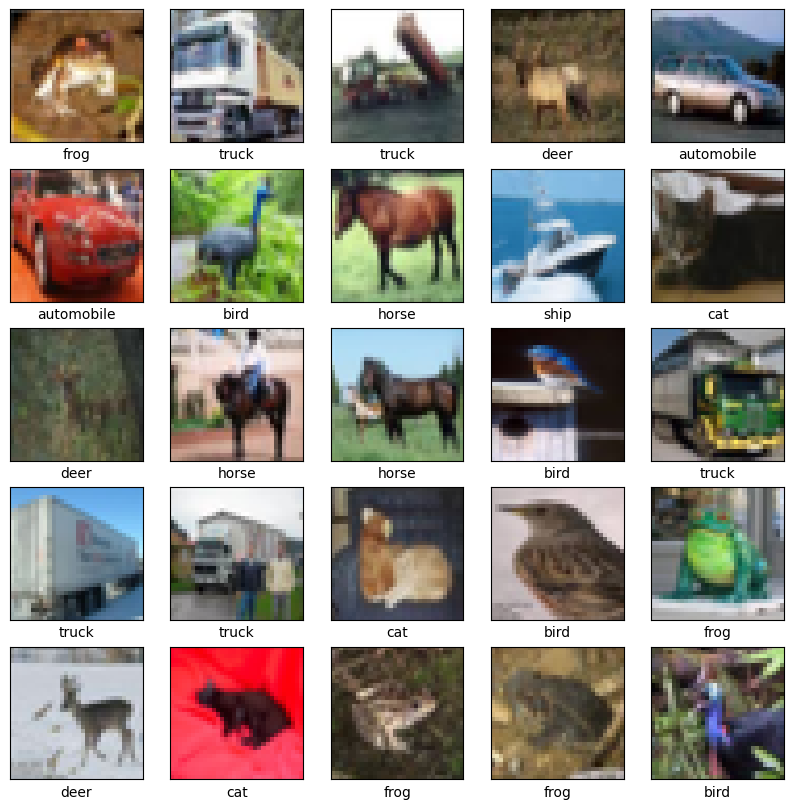

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base network

- Define the convolutional base network using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

- As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.

- If you are new to these dimensions, color_channels refers to (R,G,B).

- In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.

- You can do this by passing the argument `input_shape` to your first layer.

- <b>You are to create your own using the repeated pattern of Conv2D -> MaxPooling2D -> Repeat; feel free to experiment with different design patterns.</b>


In [40]:
# Create your sequential convolutional base network model here
tf.keras.utils.set_random_seed(42)

In [41]:
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=3,
    padding="same",
    activation="relu",
    kernel_initializer="he_normal"
)

In [42]:
cnn_model = tf.keras.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=train_images[0].shape),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=64),
    # DefaultConv2D(filters=64), removed for computational problems
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    # DefaultConv2D(filters=128), removed for computational problems
    tf.keras.layers.MaxPool2D(),
])

- Let's display the architecture of your model so far.

In [43]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        4736      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

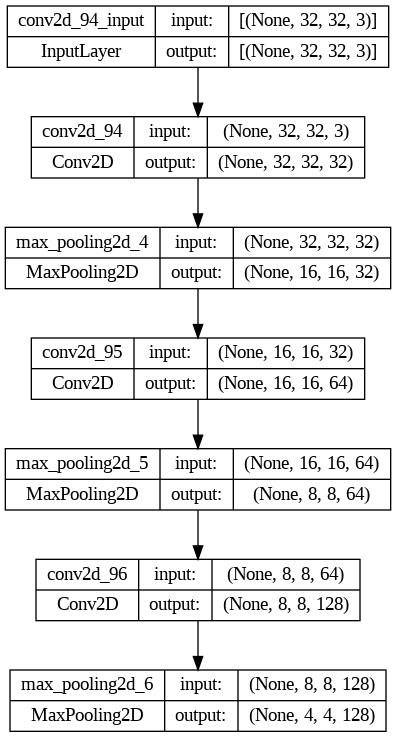

In [44]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True, show_layer_names=True)

- Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).

- The width and height dimensions tend to shrink as you go deeper in the network (due to pooling!)

- The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64, the filter size!).

- Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

- To complete the model, you will feed the last output tensor from the convolutional base  into one or more Dense layers to perform classification.

- Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.

- First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top.

- CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [45]:
# Add the dense layers here
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer='he_normal'))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer='he_normal'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(units=len(class_names), activation="softmax"))

- Here's the complete architecture of your model.

In [46]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        4736      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

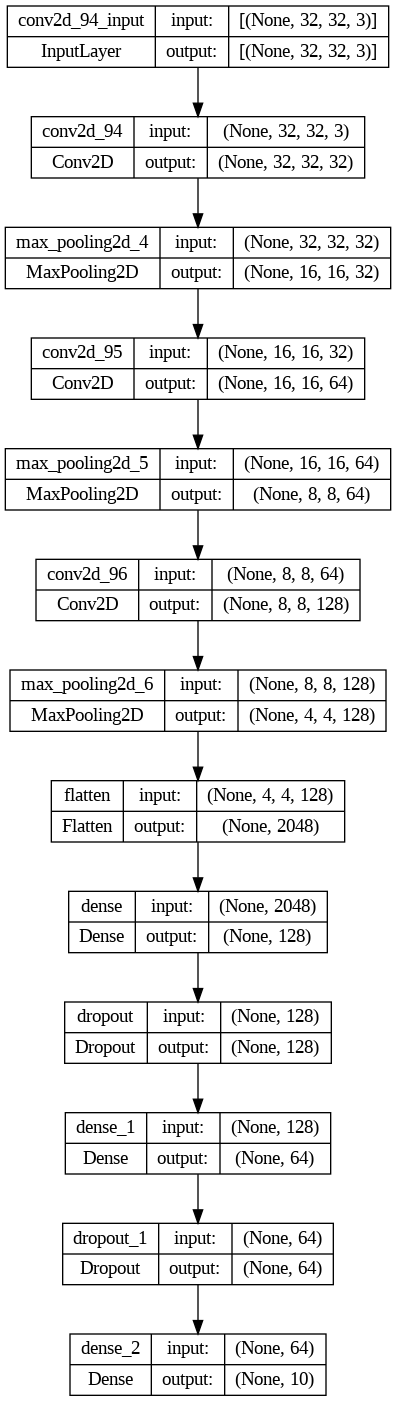

In [47]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True, show_layer_names=True)

- The network summary shows that the CNN outputs were flattened into vectors before going through two Dense layers.

### Compile and train the model

- Use the Adam optimizer and use the (test_images, test_labels) for the validation data.

In [48]:
EPOCHS = 20  # pretty low for computational reasons, will look at graphs to see if I do need a higher number of epochs
LOSS = tf.keras.losses.sparse_categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.Adam()
METRICS = [tf.keras.metrics.sparse_categorical_accuracy]

In [49]:
cnn_model.compile(
    loss=LOSS,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

In [ ]:
history = cnn_model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1563/1563 [==============================] - 15s 7ms/step - loss: 1.7376 - sparse_categorical_accuracy: 0.3620 - val_loss: 1.3339 - val_sparse_categorical_accuracy: 0.5151
Epoch 2/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3515 - sparse_categorical_accuracy: 0.5235 - val_loss: 1.1886 - val_sparse_categorical_accuracy: 0.5712
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1948 - sparse_categorical_accuracy: 0.5845 - val_loss: 1.0621 - val_sparse_categorical_accuracy: 0.6285
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0681 - sparse_categorical_accuracy: 0.6311 - val_loss: 1.0467 - val_sparse_categorical_accuracy: 0.6286
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9909 - sparse_categorical_accuracy: 0.6620 - val_loss: 0.9948 - val_sparse_categorical_accuracy: 0.6585
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9186 - sp

### Evaluate the model

- Plot the loss and the accuracy to evaluate your model.

- Compute the final test accuracy and report your results.

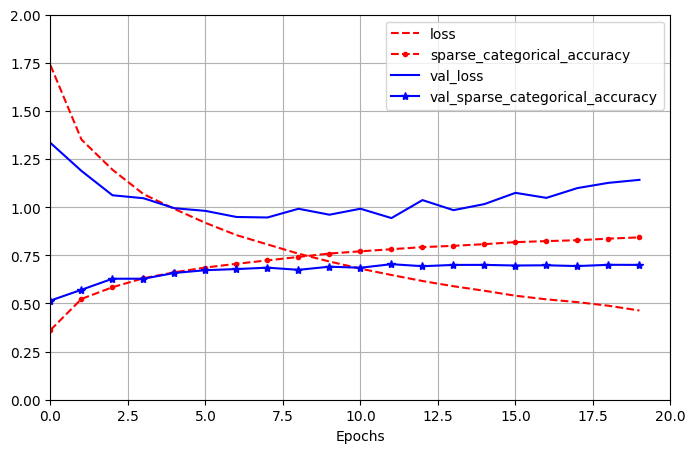

In [54]:
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,20],
    ylim=[0,2],
    grid=True,
    xlabel='Epochs',
    style=['r--', 'r--.', 'b-', 'b-*']
)

plt.show()

$\rule{800pt}{20pt}$

# Question 2: Fine-Tuning a Model

- The goal of this question is to give you practice fine-tuning a pretrained model.

## <a href="https://keras.io/api/applications/">Using Pretrained Models from Keras</a>
<br>
<font size="+1">
  <ul>
    <li>In general, you won't have to implement standard models like GoogLeNet or ResNet manually, since pretrained networks are readily available with a single line of code in <b>tf.keras.applications</b> package.</li>
    <br>
    <li>Load the ResNet-50 model, with weights that were pretrained on ImageNet</li>
    <br>
  </ul>
</font>

In [41]:
resnet_model = tf.keras.applications.ResNet50(weights='imagenet')

<br>
<font size="+1">
  <ul>
    <li>To use this model, you first need to ensure that the input images have the right size.</li>
    <br>
    <li>A ResNet-50 model expects 224x224-pixel images, so we can use the Keras Resizing layer to resize sample images.</li>
    <br>
    <li>We will use some sample images from Scikit-Learn.</li>
    <br>
  </ul>
</font>

In [42]:
from sklearn.datasets import load_sample_images

images = load_sample_images()['images']

images_resizer = tf.keras.layers.Resizing(
    height=224,
    width=224,
    # crop_to_aspect_ratio=True
)

images_resized = images_resizer(images)

In [43]:
print(images[0].shape)
print(images_resized.shape)

(427, 640, 3)
(2, 224, 224, 3)


<br>
<font size="+1">
  <ul>
    <li>The pretrained models assume that the images are preprocessed in a specific way.</li>
    <br>
    <li>In some cases, they may expect inputs to be scaled between 0 and 1, or from -1 to 1, etc.</li>
    <br>
    <li>Each model provides a <b><a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50">preprocess_input()</a></b> function that you can use to preprocess your 2D data.</li>
    <br>
    <font color="red"><li>Apply this preprocessing to the resized images.</li></font>
    <br>
  </ul>
</font>

In [44]:
def resize_images_in_batches(images, batch_size):
    num_images = images.shape[0]
    resized_images = np.zeros((num_images, 224, 224, 3))

    for start in range(0, num_images, batch_size):
        end = min(start + batch_size, num_images)
        resized_batch = tf.image.resize(images[start:end], (224, 224)).numpy()
        resized_images[start:end] = resized_batch

    return resized_images

In [45]:
batch_size = 1

# train_images_resized = resize_images_in_batches(train_images, batch_size)
# train_images_resized = tf.keras.applications.resnet50.preprocess_input(train_images_resized)

In [46]:
processed_images = tf.keras.applications.resnet50.preprocess_input(images_resized)

<br>
<font size="+1">
  <ul>
    <font color="red"><li>Now use your pretrained model to predict on the preprocessed images, which act as the model's inputs.</li>
    <br>
    <li>Verify the output represents probabilities by summing the output per image (they should sum to one).</li>
    <br>
  </ul>
</font>

In [47]:
for layers in resnet_model.layers:
  layers.trainable = False


# resnet_model.summary()

In [48]:
# Now use the pretrained model to make predictions
Y_hat_probabilities = resnet_model.predict(processed_images)

1/1 [==============================] - 3s 3s/step


In [49]:
Y_hat_probabilities.sum(axis=1)

array([1.0000001, 1.0000001], dtype=float32)

In [50]:
# pretty close to one for each of the two images. I believe that 0.0000001 difference is due to numerical instability.

<br>
<font size="+1">
  <ul>
    <li>As usual, the probability output is a matrix with one row per image, and one column per class (in this case, there are 1,000 classes).</li>
    <br>
    <li>If you want to display the top $K$ predictions, including the class name and the estimated probability of each predicted class, use the <b>decode_predictions()</b> function.</li>
    <br>
    <font color="red"><li>Run the following code and see what happens to the output of your model.</li></font>
    <br>
  </ul>
</font>

$\square$

In [60]:
# # Use the following code to decode the output of the pretrained model
# # You need to define Y_hat_probabilities as the output

top_K = tf.keras.applications.resnet50.decode_predictions(Y_hat_probabilities, top=3)

for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id, name, y_prob, in top_K[image_index]:
    print(f"{class_id} - {name:12s} {y_prob:.2%}")
  print("-"*30)

Image #0
n02825657 - bell_cote    82.35%
n03877845 - palace       6.75%
n03781244 - monastery    4.19%
------------------------------
Image #1
n03530642 - honeycomb    49.81%
n13040303 - stinkhorn    33.96%
n02206856 - bee          4.35%
------------------------------


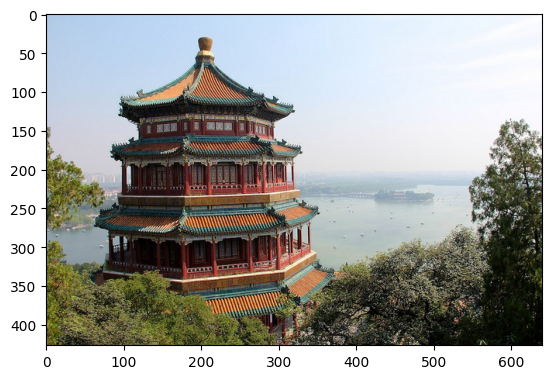

In [61]:
# the first image is a palace, so Y_hat = Y!
plt.imshow(images[0])

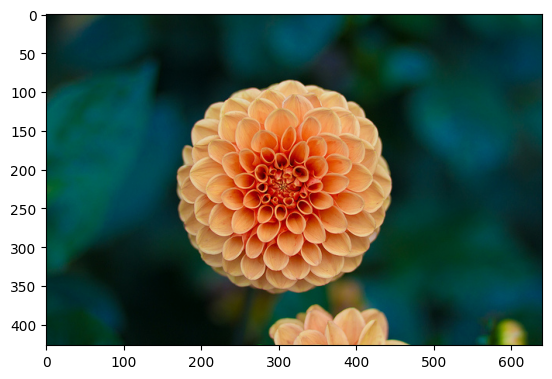

In [62]:
# the second image is a dahlia, so Y_hat != Y
plt.imshow(images[1])

<br>
<font size="+1">
  <ul>
    <li>The model is correct for the first image, but wrong for the second image; however, <b>dahlia is not one of the 1,000 ImageNet classes!</b></li>
    <br>
    <li>With that in mind, that this is new, unseen data that isn't related to the training set where the model was trained on, a vase seems to be a reasonable guess and daisy isn't a bad choice either!</li>
    <br>
    <li>Using pretrained models, it is fairly easy to create a pretty good image classifier using a pretrained model.</li>
    <br>
    <font color="red"><li>But what if you want to use an image classifier for classes of images that are not part of ImageNet? We can still use pretrained models by using them to perform transfer learning!</li></font>
    <br>
  </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

## Transfer Learning with Keras
<br>
<font size="+1">
  <ul>
    <font color="blue"><li>Let's consider a pseudo-code example where you decide to reuse all the layers except for the output layer.</li>
    <br>
    <li><b>The following few cells are just for learning purposes, you do not need to do anything.</b></font>
    <br>
  </ul>
</font>

$\square$

In [ ]:
# # Assume "my_pretrained_model" is already trained and saved, and we are loading the model from memory
# pre_trained_model = tf.keras.models.load_model("my_pretrained_model")

# # select all the pretrained model's layers except for the last one
# model_built_using_pretrained_model = tf.keras.Sequential(pre_trained_model.layers[:-1])

# # add a distinct trainable layer
# model_built_using_pretrained_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

- The newly built model, as is, will share some layers.

- When you train the <i>model_built_using_pretrained_model</i>, it will affect the <i>pre_trained_model</i>.

  - If you want to avoid that, you need to <b>clone</b> the model before you reuse its layers, and the <b>copy</b> its weights.

In [ ]:
# # Cloning only copys the architecture, and not the weights
# cloned_pre_trained_model = tf.keras.models.clone_model(pre_trained_model)

# # If you do not manually set the weights, then they will be initialized randomly
# cloned_pre_trained_model.set_weights(pre_trained_model.get_weights())

- You can now train the <i>model_built_using_pretrained_model</i>, but since the new output layer was initialized randomly, it will make large errors (at least during the first few epochs), so there will be large error gradients that can destroy the reused weights.

- To prevent this, one approach is to freeze the reused layers during the first few epochs, which gives the new layer time to learn reasonable weights.

  - To do this, set every layer's trainable attribute to <b>False</b> and compile the model.

In [ ]:
# for layer in model_built_using_pretrained_model.layers[:-1]:
#   layer.trainable = False

# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
# model_built_using_pretrained_model.compile(loss="binary_crossentropy",
#                                            optimizer= optimizer,
#                                            metrics=["accuracy"])

- <b>You must always compile your model after you freeze or unfreeze layers</b>

- You can train the model for a few epochs, then unfreeze the reused layers (which requires compiling the model again) and continue training to fine-tune the reused layers.

- After unfreezing the reused layers, it is a good idea to <b>reduce the learning rate</b>, to avoid damaging the reused weights.

In [ ]:
# history = model_built_using_pretrained_model.fit(X_train, Y_train,
#                                                  epochs=5,
#                                                  validation_data=(X_valid, Y_valid))

# for layer in model_built_using_pretrained_model.layers[:-1]:
#   layer.trainable = True


# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
# model_built_using_pretrained_model.compile(loss="binary_crossentropy",
#                                            optimizer=optimizer,
#                                            metrics=["accuracy"])

# history = model_built_using_pretrained_model.fit(X_train, Y_train,
#                                                  epochs=100,
#                                                  validation_data=(X_valid, Y_valid))

- A remark on when transfer learning can work:

  - It turns out that transfer learning doesn't work very well with small dense networks, likely because <b>small</b> networks learn only a few patterns and <b>dense</b> networks learn very specific patterns, which are not likely to be useful in other tasks.

  - Transfer learning tends to work best with larger models for structured data like CNNs for spatial data or Transformer models for sequence data

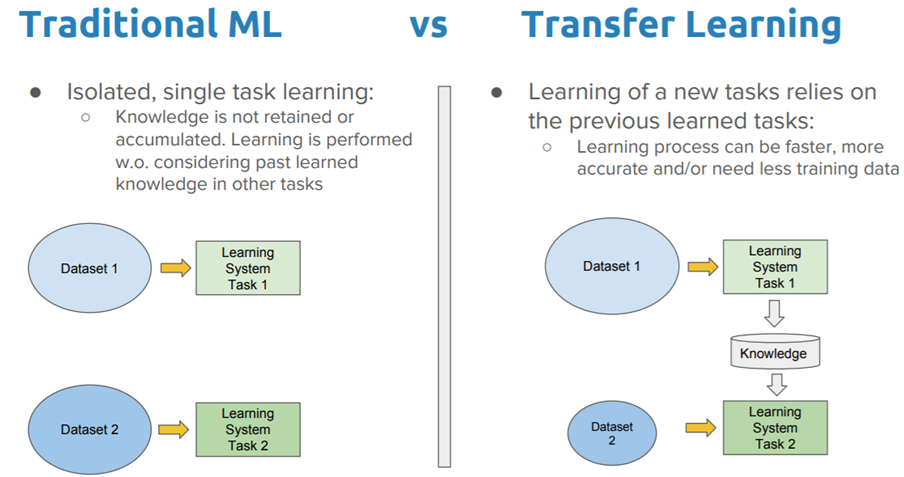

In [63]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'traditional_ml_vs_transfer_learning.png'))

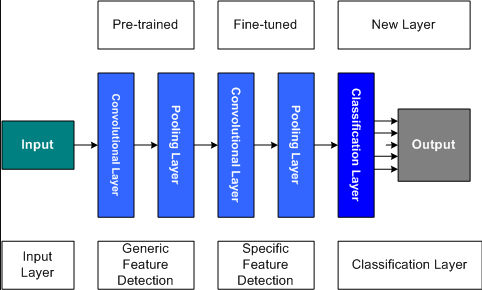

In [64]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'transfer_learning_pretrained_models.png'))

$\rule{800pt}{20pt}$

## Pretrained Models for Transfer Learning
<br>
<font size="+1">
  <ul>
    <li>If you want to build an image classifier, but you do not have enough data to train it from scratch, then it is often a good idea to reuse the lower layers of a pretrained model.</li>
    <br>
    <li>As an example, we will use a pretrained Xception model to help build a model that classifies pictures of flowers.</li>
    <br>
    <font color="red"><li>Run the following code to generate a new flowers dataset and preprocess the images.</li></font>
    <br>
  </ul>
</font>

$\square$

In [11]:
# load the data using TF Datasets

import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [12]:
# this dataset only has training data, so we need to split into train / validation / test

test_set_raw, validation_set_raw, train_set_raw = tfds.load("tf_flowers", split=["train[:10%]", "train[10%:25%]", "train[25%:]"], as_supervised=True)

<br>
<font size="+1">
  <ul>
    <li>All three datasets contain individual images.</li>
    <br>
    <li>We need to batch them, but first we need to ensure they all have the same size.</li>
    <br>
  </ul>
</font>

$\square$

In [13]:
# Image preprocessing

batch_size = 32

preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set = train_set_raw.map(lambda X, Y: (preprocess(X), Y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)

validation_set = validation_set_raw.map(lambda X, Y: (preprocess(X), Y)).batch(batch_size)

test_set = test_set_raw.map(lambda X, Y: (preprocess(X), Y)).batch(batch_size)

<br>
<font size="+1">
  <ul>
    <li>Now each batch contains 32 images, all of them are 224x224 pixels, with pixel values ranging from -1 to 1.</li>
    <br>
    <li>The data is now resized in such a way that it can be passed to the pretrained Xception model.</li>
    <br>
  </ul>
</font>

$\square$

In [14]:
# We will use some data augmentation

# To do so, we will create a data augmentation model that we will embed in our final model.

# During training, it will randomly flip the images horizontally, rotate them a little bit, and tweak the contrast

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

<br>
<font size="+1">
  <ul>
    <font color="red"><li>Now, you need to load an Xception model that was pretrained on ImageNet.</li>
    <br>
    <li>You should exclude the top of the network by setting <b>include_top=False</b>; this will exclude the global average pooling layer and the dense output layer.</li>
    <br>
    <li>Then add your own global average pooling layer (feeding it the output of the base model), followed by a dense output layer with one unit per flower-class, using the softmax activation function. You will likely need to use the functional API.</li>
    <br>
    <li>Finally, you should wrap your model in a Keras <b>Model</b>.</li>
    <br>
  </ul>
</font>

$\square$

In [35]:
xception_model = tf.keras.applications.Xception(weights='imagenet', include_top=False)

model = tf.keras.Sequential([
    xception_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(n_classes, activation=tf.keras.layers.Softmax())
])

<br>
<font size="+1">
  <ul>
    <font color="red"><li>You should freeze the weights of the pretrained layers, at least of the beginning of training.</li>
    <br>
    <li>Use an SGD optimizer with the arguments: <b>learning_rate=0.1, momentum=0.9</b>.</li>
    <br>
    <li>Compile the model and then fit the model with the validation data coming from the validation_set (created above); only use <b>3 epochs</b> and use your GPU on Colab.</li>
    <br>
  </ul>
</font>

$\square$

In [37]:
for layer in model.layers[0].layers:
  layer.trainable = False

In [38]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer= optimizer,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)


In [39]:
# now we can compile the model and start training
history = model.fit(
    train_set,
    epochs=3,
    validation_data=(validation_set)
)

Epoch 1/3
86/86 [==============================] - 19s 170ms/step - loss: 16.3640 - sparse_categorical_accuracy: 0.7562 - val_loss: 11.6599 - val_sparse_categorical_accuracy: 0.7931
Epoch 2/3
86/86 [==============================] - 14s 158ms/step - loss: 6.2554 - sparse_categorical_accuracy: 0.8674 - val_loss: 9.8215 - val_sparse_categorical_accuracy: 0.8348
Epoch 3/3
86/86 [==============================] - 14s 158ms/step - loss: 4.3527 - sparse_categorical_accuracy: 0.8972 - val_loss: 8.1492 - val_sparse_categorical_accuracy: 0.8439


<br>
<font size="+1">
  <ul>
    <font color="red"><li><b>Once validation accuracy stops improving after a few epochs, you can assume that the top layers are well trained and you are ready to unfreeze some of the base model's top layers, then continue training.</b></li>
    <br>
    <li><b>For example, you should unfreeze layers 56 and above (that's the start of residual unit 7 out of 14).</b></li>
    <br>
    <li><b>Don't forget to compile the model whenever you freeze or unfreeze layers.</b></li>
    <br>
    <li><b>Also, be sure to use a much lower learning rate to avoid damaging the pretrained weights.</b></li>
    <br>
    <li><b>Describe how your fine-tuned model is performing.</b></li></font>
    <br>
  </ul>
</font>

$\square$

In [40]:
for i, layer in enumerate(model.layers[0].layers):
  if i >= 55:
    layer.trainable = True

In [41]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer= optimizer,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [42]:
# now we can compile the model and start training
history = model.fit(
    train_set,
    epochs=10,
    validation_data=(validation_set)
)

history = pd.DataFrame(history.history)

Epoch 1/10
86/86 [==============================] - 39s 315ms/step - loss: 3.1387 - sparse_categorical_accuracy: 0.8528 - val_loss: 3.7522 - val_sparse_categorical_accuracy: 0.8657
Epoch 2/10
86/86 [==============================] - 27s 306ms/step - loss: 0.5420 - sparse_categorical_accuracy: 0.9273 - val_loss: 1.9865 - val_sparse_categorical_accuracy: 0.8711
Epoch 3/10
86/86 [==============================] - 26s 297ms/step - loss: 0.1908 - sparse_categorical_accuracy: 0.9546 - val_loss: 1.3800 - val_sparse_categorical_accuracy: 0.8584
Epoch 4/10
86/86 [==============================] - 26s 298ms/step - loss: 0.1326 - sparse_categorical_accuracy: 0.9680 - val_loss: 1.2034 - val_sparse_categorical_accuracy: 0.8566
Epoch 5/10
86/86 [==============================] - 27s 304ms/step - loss: 0.0830 - sparse_categorical_accuracy: 0.9757 - val_loss: 1.1141 - val_sparse_categorical_accuracy: 0.8603
Epoch 6/10
86/86 [==============================] - 27s 306ms/step - loss: 0.0662 - sparse_cate

In [ ]:
# To improve this model even further, you can:
## tune the hyperparameters,
## lower the learning rate,
## and train for longer (epochs > 10)

In [54]:
val_loss, val_metric = model.evaluate(validation_set, verbose=0)

print(f"Val Loss: {val_loss}, Val Metric: {val_metric}")

Val Loss: 1.0459442138671875, Val Metric: 0.8620689511299133


The model seems to perfom pretty well, achieving an R2 of more than 0.86.
Note that before tuning the base model, the model only achieved an R2 of 0.83. However, after having unfrozen a portion of the base layer, the model improved in accuracy and loss. After ten epochs, the train loss seems to have converged almost to zero, so I believe that even with tricks, accuracy canonot be improved to much (unless we are overfitting).

$\rule{800pt}{20pt}$

# Question 3: Tweaking the Recommendation System

- This question is based around the notebook: <b>04_Building_a_Recommender_System_Using_CNNs_Embeddings_and_Similarity_Scores.ipynb</b>.

- The goal is to make some tweaks to the code.

- Using the data from the recommender system notebook, implement the following changes:

  - load the pretrained model <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16">VGG-16</a> (VGG = Visual Geometry Group) and use it as the product embedding

    - test how it performs on the same products that we looked at from the in-class notebook, what do you notice about the recommendations?

  - pick another pretrained model of your choosing from <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications">here</a> and use it as the product embedding

    - test how it performs on the same products that we looked at from the in-class notebook, what do you notice about the recommendations?
  

---

---

<font color="red">You do not have to do the following; they are just extra practice if you are interested.</font>

---

---



- If you are curious for more examples using neural networks to recommend, see:

  - <a href="https://keras.io/examples/structured_data/collaborative_filtering_movielens/">Collaborative Filtering for Movie Recommendations: Recommending movies using a model trained on Movielens dataset.</a>

  - <a href="https://keras.io/examples/structured_data/movielens_recommendations_transformers/">A Transformer-based recommendation system: Rating rate prediction using the Behavior Sequence Transformer (BST) model on the Movielens.</a>

- An interesting exercise would be to write a summary of how a company of your choosing uses a recommendation system in their business model: it should include a description of the system from a business intelligence point of view, a methodological / algorithmic perspective, and an engineering / implementation perspective - you must cite your references by providing a link.

- Another interesting exercise would be to use the same ResNet from the in-class notebook, and use a different similarity metric to see how the algorithm recommends:

| Similarity Metric     | Vector Properties Considered |
|-----------------------|------------------------------|
| Euclidean distance    | Magnitudes and direction     |
| Cosine similarity     | Only direction               |
| Dot product similarity| Magnitudes and direction     |


- Another interesting exercise would be to train an embedding using an autoencoder and use the output from the encoder as the embedding.

### Data

In [9]:
df = pd.read_csv(os.path.join(data_path, 'styles.csv'), nrows=5000)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


<Axes: ylabel='articleType'>

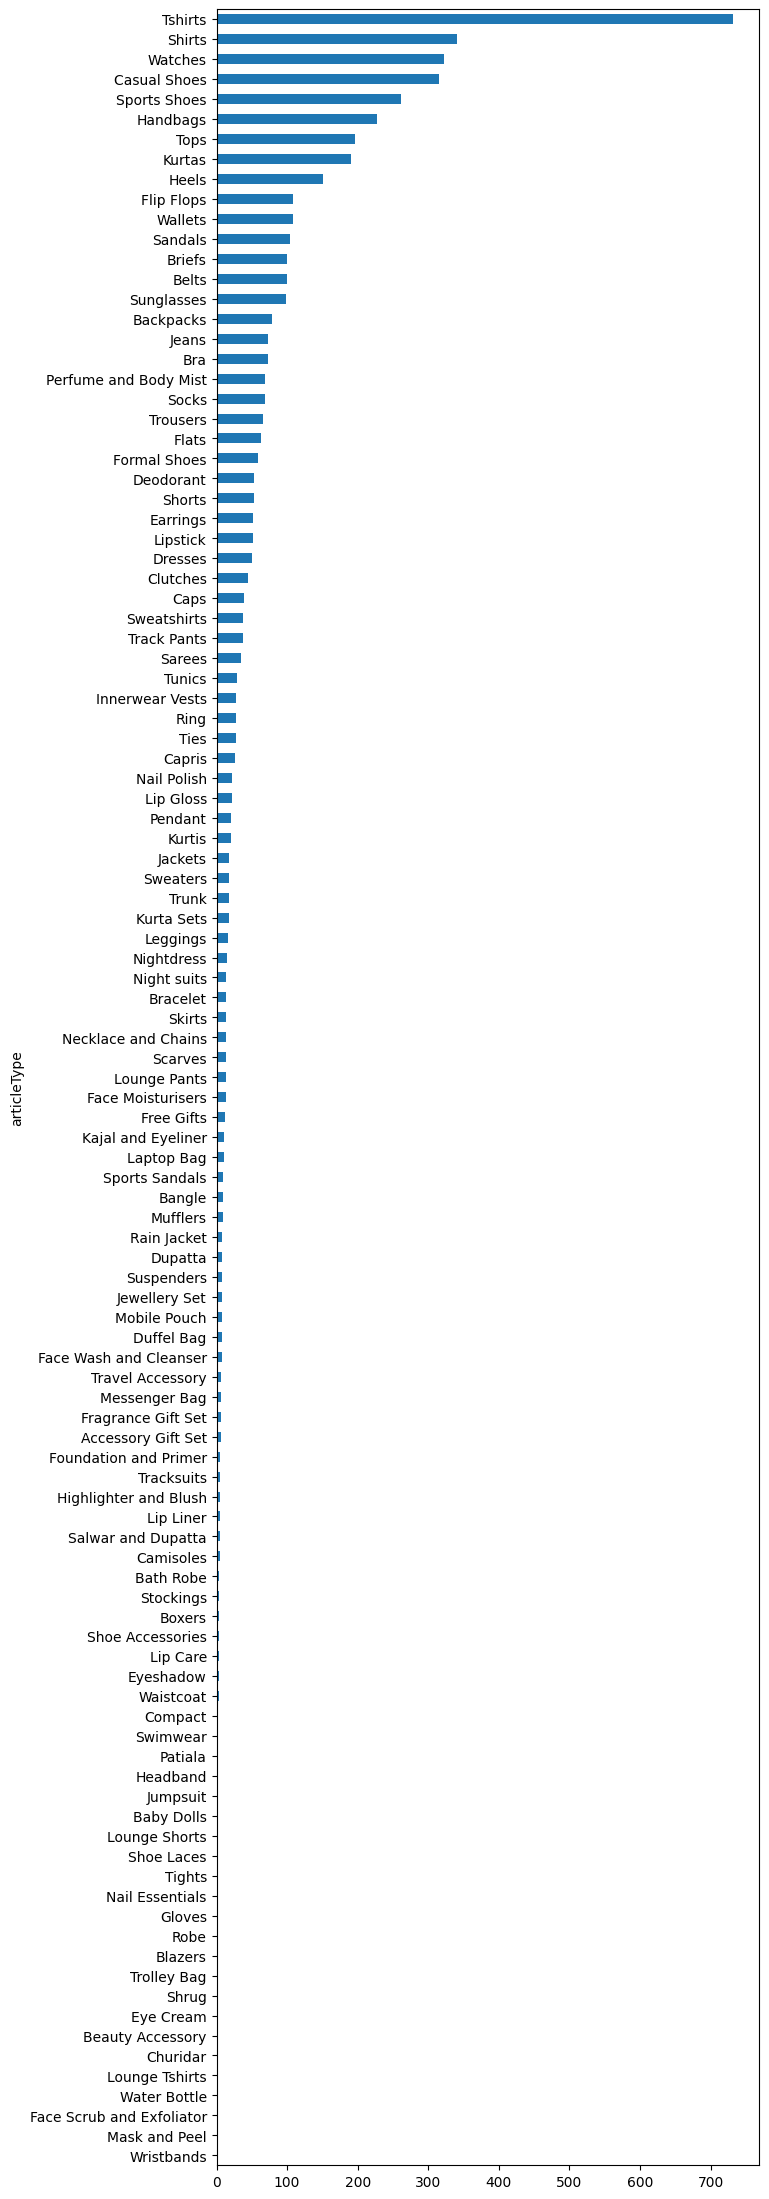

In [10]:
df['articleType'].value_counts().sort_values().plot(kind='barh', figsize=(7,28))

In [24]:
img_width, img_height, img_channels = 224, 224, 3

$\rule{800pt}{20pt}$

### Model

In [25]:
# Pre-Trained Model
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape = (img_width, img_height, img_channels)
)

for layers in base_model.layers:
  layers.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [21]:
def get_embedding(model, img_name):
    # Reshape
    img = tf.keras.preprocessing.image.load_img(os.path.join(data_path, 'images', img_name), target_size=(img_width, img_height))
    x   = tf.keras.preprocessing.image.img_to_array(img)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = tf.keras.applications.vgg16.preprocess_input(x)
    return model.predict(x).reshape(-1)

In [23]:
get_embedding(model, df.iloc[0]['image']).shape

1/1 [==============================] - 0s 74ms/step


(512,)

In [26]:
map_embeddings = df['image'].apply(lambda img: get_embedding(model, img))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [27]:
df_embs = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

(5000, 512)


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,31.995508,0.000000,42.039864,0.000000,16.478205,5.265640,14.415413,0.000000,31.334990,0.000000,...,0.000000,23.615625,0.000000,6.146307,0.000000,25.237303,18.948944,0.000000,6.719710,0.000000
1,0.000000,0.000000,6.083491,0.000000,16.547915,24.478884,14.022788,7.280965,36.898693,0.000000,...,0.000000,64.777771,0.000000,21.648495,0.000000,20.778326,35.637466,0.000000,43.800877,7.511488
2,71.445717,0.149217,0.000000,78.734589,0.000000,5.777651,46.573132,0.000000,5.216073,23.036577,...,0.084442,0.000000,1.313998,0.000000,0.000000,25.405756,9.973016,0.000000,11.206230,0.000000
3,4.960728,11.385852,0.000000,0.000000,20.224401,26.026937,38.720901,9.659359,20.998373,0.000000,...,0.000000,137.025467,0.000000,9.216298,19.421844,14.997112,49.465961,1.890025,5.897563,0.753218
4,12.635270,0.000000,1.756616,0.000000,23.259027,16.987385,11.820110,21.016678,24.071871,0.000000,...,0.000000,54.992783,0.000000,2.899198,0.000000,18.610624,89.455833,0.000000,33.367149,0.000000


### Reccomendations

In [28]:
from sklearn.metrics.pairwise import pairwise_distances

cosine_sim = 1 - pairwise_distances(df_embs, metric='cosine')

In [29]:
indices = pd.Series(range(len(df)), index=df.index)


def get_recommender(idx, df, top_n = 5):
    """Get recommendations based on the cosine similarity score"""
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]

    return indices.iloc[idx_rec].index, idx_sim

In [30]:
import cv2

def load_image(img, resized_fac =1):
    img     = cv2.imread(os.path.join(data_path, 'images', img))
    return img



def plot_figures(figures, nrows = 1, ncols=1, figsize=(6, 6)):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for index,title in enumerate(figures):
        axes.ravel()[index].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axes.ravel()[index].set_title(title)
        axes.ravel()[index].set_axis_off()

    plt.tight_layout()

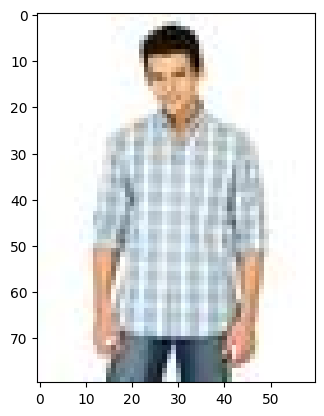

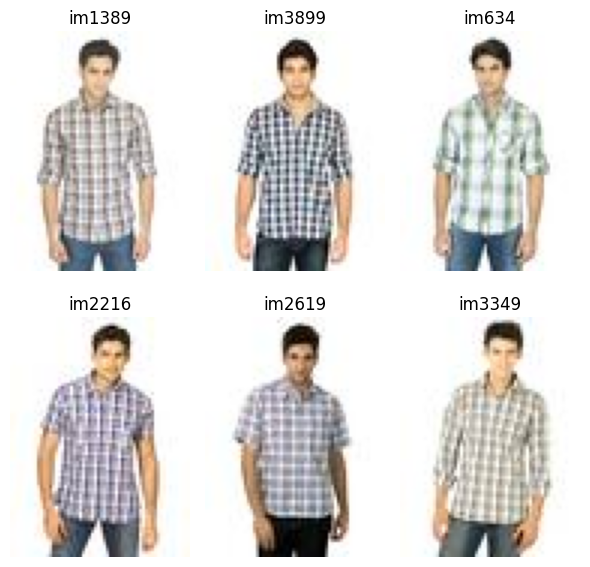

In [32]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

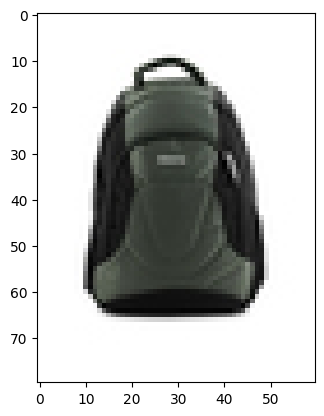

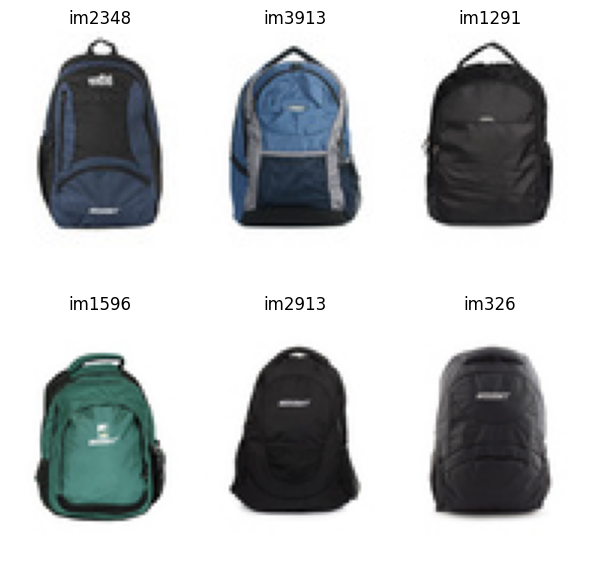

In [33]:
idx_ref = 508

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

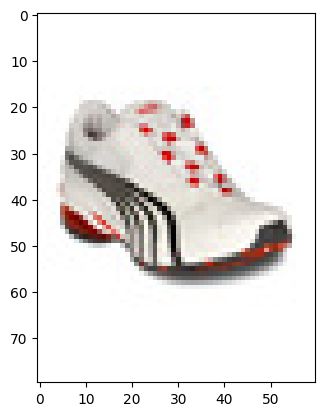

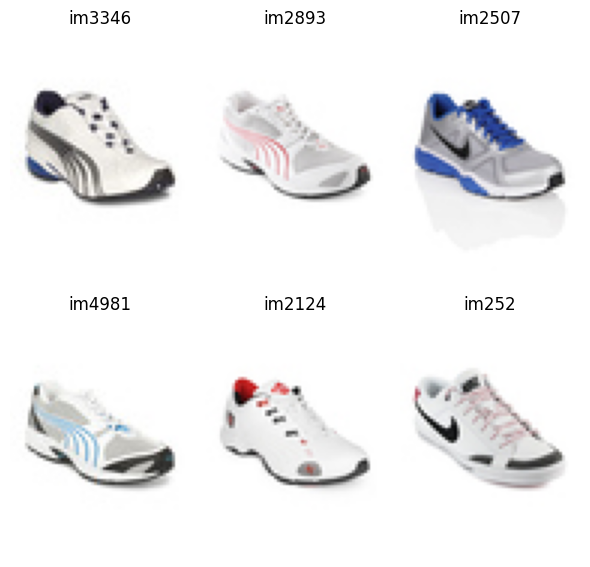

In [34]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

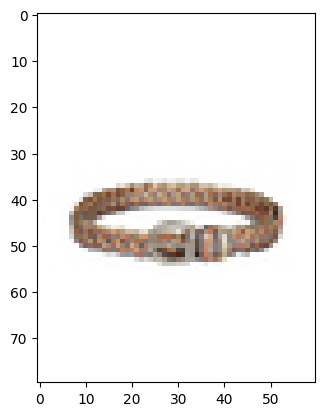

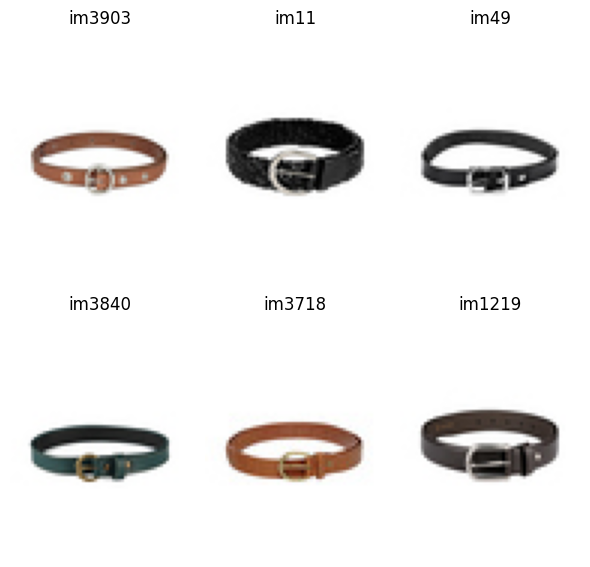

In [35]:
idx_ref = 3524

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

The model seems to perform well, but worse than the ResNet50 we used in class. Indeed, altough the reccomender system manages to find similar items in terms of category (i.e. shirt with shirt, shoe with shoe etc.), it performs less better at matching the colors. For instance, in the shoe expample, the model we built in class was matching a red shoe with other 6 red shoes, while our model here also proposed blue shoes. This might be because the embeddings live in a lower dimensional space (512 rather than 2048), hence might be capturing less infromation.

### Another model
In this section, I will setup a reccomender system that uses the based model **inception_v3**. However, I will not proceed to the actual training of the NN, as it is incredibly computationally expensive and my computer already struggled a lot for the previous task.

In [37]:
# Pre-Trained Model
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape = (img_width, img_height, img_channels)
)

for layers in base_model.layers:
  layers.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D()
])

model.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_max_pooling2d_3 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 21802784 (83.17 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [38]:
def get_embedding(model, img_name):
    # Reshape
    img = tf.keras.preprocessing.image.load_img(os.path.join(data_path, 'images', img_name), target_size=(img_width, img_height))
    x   = tf.keras.preprocessing.image.img_to_array(img)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = tf.keras.applications.inception_v3.preprocess_input(x)
    return model.predict(x).reshape(-1)

In [39]:
get_embedding(model, df.iloc[0]['image']).shape

1/1 [==============================] - 3s 3s/step


(2048,)

In [ ]:
# map_embeddings = df['image'].apply(lambda img: get_embedding(model, img))

# Question 4: Read Two Tutorials and Summarize

- Read the following TensorFlow tutorials (you can implement them if you're feeling ambitious):

  - <a href="https://www.tensorflow.org/tutorials/video/transfer_learning_with_movinet">Transfer learning for video classification with MoViNet</a>,
  
  -  and <a href="https://www.tensorflow.org/tutorials/generative/style_transfer
">Neural style transfer using a generative CNN</a>.

- Write a clear and concise summary (at least three paragraphs)

  - describing what they are doing,
  
  - how do they compare and contrast to eachother,
  
  - and how the methods can be adapted for the creation of products or services.


Write your summaries in a text box.

- **MoViNet**: The MoViNet (Mobile Video Networks) models are neural networks designed for efficient video processing, particularly on mobile devices. These models are pretrained on extensive video datasets and use transfer learning to adapt to new video classification tasks. Their architecture is optimized for low-latency and real-time operations.

- **Neural Style Transfer**: this is a technique which involves using convolutional neural networks (CNNs) to apply the artistic style of one image to the content of another. The process uses deep neural networks to separate and recombine the content and style of images. This involves adjusting the network's weights until the output image minimizes a loss function that measures the difference in content between the target and output images and the difference in style between the reference style image and the output.

- **Comparison**: while MoViNet is tailored for video classification tasks, focusing on recognizing and categorizing video data efficiently, neural style transfer is aimed at transforming the aesthetic of images. MoViNet operates under constraints of mobile environments, optimizing for speed and resource efficiency. In contrast, style transfer, though computationally demanding, focuses more on artistic output, which does not usually require real-time processing.

- **Applications**: businesses can use MoViNet for developing applications that require immediate video analysis, such as monitoring systems in retail for security or customer behavior analysis. Neural style transfer, on the other hand, can be leveraged in creative sectors for generating unique marketing content or customizing user interfaces and experiences in apps.